<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/alternus_vera/Invincibles_Alternus_Vera_Iteration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **Invincibles**
    
Name: 

**Shailesha Prasad Maganahalli**<br>
**Atul Shah**<br>
**Srilalitha Veerubhotla**<br>
**Shreyus Puthiyapurail**<br>


-----

GitHub URL:

Notebook: https://github.com/mal258/machinelearning258/tree/master/alternus_vera

Dataset:


 1. Liar-Liar dataset <br>
 (https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK)
 2. Fake News dataset <br>(https://www.kaggle.com/manasvik/spam-check/data)
 3. UCI-News Aggregator<br>
(http://archive.ics.uci.edu/ml/datasets/News+Aggregator)

4. Google News corpus word2vec <br>
(https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)

### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).


    

### Process of our Approach 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Source Reputation
- **Feature 2 :** Location- Geography
- **Feature 3 :** Social Credibility 
- **Feature 4 :** BERT model

- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection


### Team Contributions:

|Features  |  Member |
|-----|-----|
| Source Reputation                         |  Shailesha Prasad Maganahalli |  
| Location- Geography                |  Atul Shah | 
| Social Credibility                   | Shreyus Puthiyapurail   |   
| BERT model                             | Srilalitha Veerubhotla |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 


#### What did we try and what worked? 

> We imported the following 3 datasets:
> 1. Liar-Liar dataset <br>
 (https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK)
> 2. Fake News dataset <br>(https://www.kaggle.com/manasvik/spam-check/data)
> 3. UCI-News Aggregator<br>
(http://archive.ics.uci.edu/ml/datasets/News+Aggregator)

>For preprocessing and spellcheck, we used:

>Google News corpus word2vec <br>
(https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)

>We narrowed down to following features:

- **Feature 1 :** Source Reputation
- **Feature 2 :** Location- Geography
- **Feature 3 :** Social Credibility 
- **Feature 4 :** BERT model

>Basic NLTK preprocessing and Visualizations are completed.

#### What did not work?

> Google word2vec spellchecker timeout: (3 billion running words) to word vector model (3 million 300-dimension English word vectors).



#### What alternatives did you try?

> We tried to upgrade to GPU, and restart the kernel.
> We also explored alternate corpus to do pre-processing.

#### Pending items

> Preprocessing with word2vec corpus 
> Feature modeling <br>
> Combined model in Iteration 2


### Reading the Data

In [0]:
import pandas as pd
import numpy as np
import csv
import gensim
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
import matplotlib.pyplot as plt
import requests
import re
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import io





In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
%matplotlib inline

In [33]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
test_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/test.tsv"
train_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/train.tsv"
valid_url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/valid.tsv"



colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news_df = pd.read_csv(train_url, sep='\t', names = colnames, error_bad_lines=False)
test_news_df = pd.read_csv(test_url, sep='\t', names = colnames, error_bad_lines=False)
valid_news_df = pd.read_csv(valid_url, sep='\t', names = colnames, error_bad_lines=False)

In [35]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news_df.shape, 'test dim:', test_news_df.shape)
train_news_df.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


## Data Cleaning and Text Preprocessing 

*Steps included in the preprocessing:*

 1. Remove non-letters/Special Characters and Punctuations
 2. Convert to lower case.
 3. Tokenize.
 4. Convert the stopwords list to "set" data type.
 5. Remove stop words. 
 6. Lemmentize 
 7. Stemming
 8. Join the stemmed words back into one string separated by space, and return the result.

In [36]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess(raw_news):
    news = re.sub("[^a-zA-Z]", " ", raw_news)   
    news =  news.lower()   
    news_words = nltk.word_tokenize( news)
    stops = set(nltk.corpus.stopwords.words("english"))
    words = [w for w in  news_words  if not w in stops]
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    return " ".join(stems)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
train_news_df['clean'] = train_news_df["headline_text"].apply(preprocess) 
test_news_df['clean'] = test_news_df["headline_text"].apply(preprocess)
valid_news_df['clean'] = valid_news_df["headline_text"].apply(preprocess)




In [38]:
train_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term


In [39]:
test_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether he center crimin scheme vio...


In [40]:
valid_news_df.head()

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News,le american work
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN,obama sworn offic use holi bibl instead kuran ...
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing,say organ parad social welfar organ involv pol...
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article,say near half oregon child poor
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News,attack republican various program econom stimu...


### Spell Check Google News



In [41]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

from gensim import models

model = gensim.models.KeyedVectors.load_word2vec_format('/root/input/GoogleNews-vectors-negative300.bin.gz', binary=True)



words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

--2020-04-20 06:01:03--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.177.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.177.125|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



### Visualization 



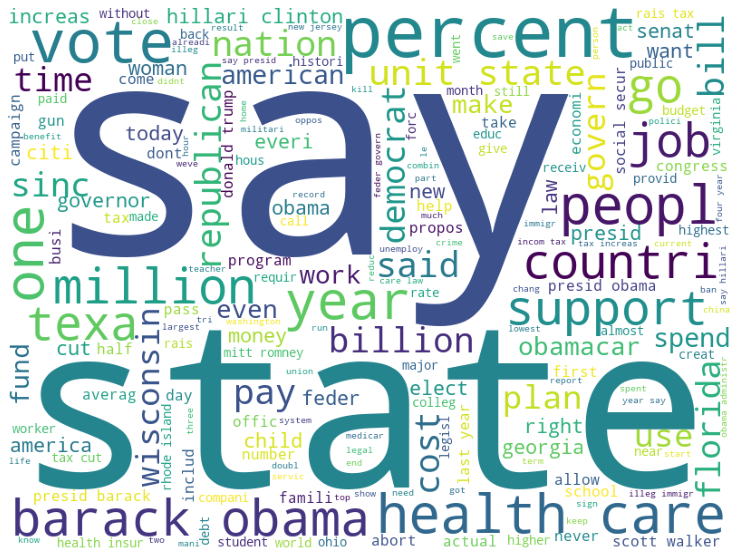

In [43]:
def word_cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
word_cloud(' '.join(train_news_df['clean']))

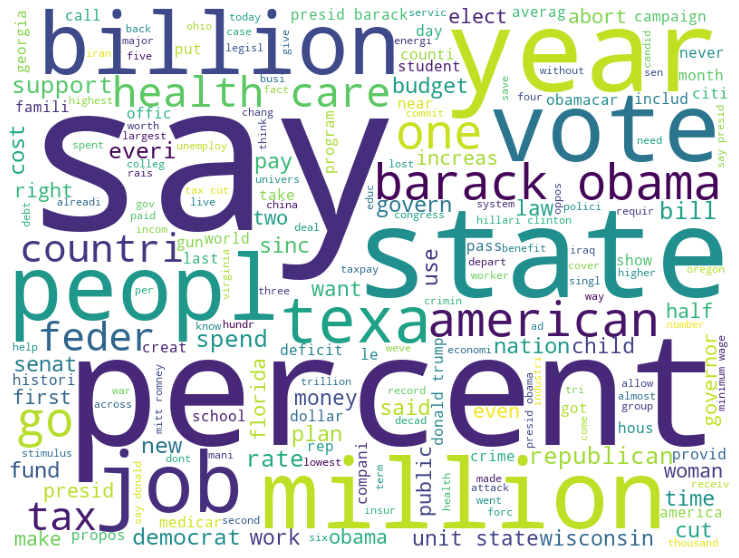

In [44]:
word_cloud(' '.join(test_news_df['clean']))

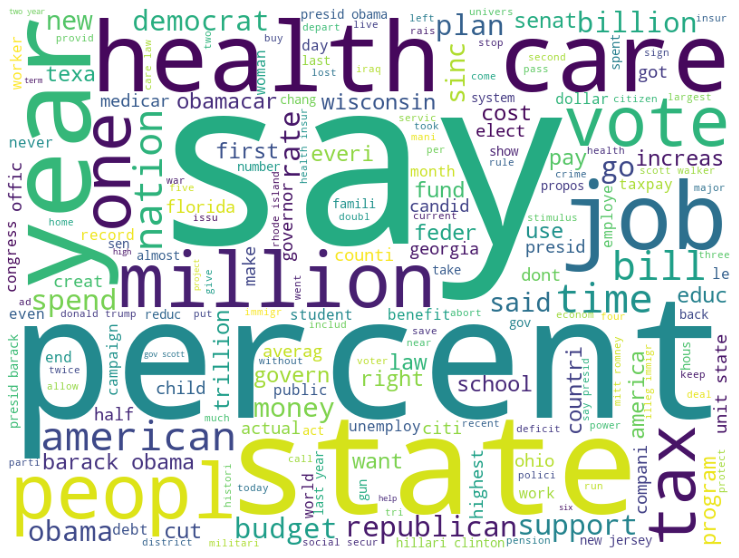

In [45]:
word_cloud(' '.join(valid_news_df['clean']))

##Data Enrichment by adding News Source Dataset 

In [0]:

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/news_source/news_source.xlsx"


news_source=pd.read_excel(url)



**Features** <br>

Source: http://archive.ics.uci.edu/ml/datasets/News+Aggregator <br>
ID Numeric ID <br>
TITLE News title <br>
URL Url <br>
PUBLISHER Publisher name <br>
CATEGORY News category (b = business, t = science and technology, e = entertainment, m = health) <br>
STORY Alphanumeric ID of the cluster that includes news about the same story <br>
HOSTNAME Url hostname <br>
TIMESTAMP Approximate time the news was published, as the number of milliseconds since the epoch 00:00:00 GMT, January 1, 1970



In [47]:
news_source.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


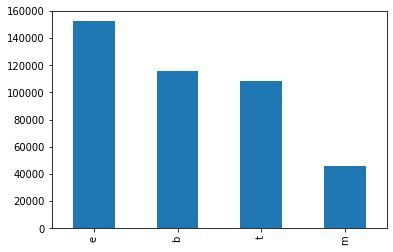

In [48]:

# print the topics being addressed here
news_source['CATEGORY'].value_counts().plot(kind="bar")
plt.show()


##Data Enrichment by adding Fake News Dataset

In [0]:

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/politifact/fake.csv"
file=requests.get(url).content
fake_news=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')


In [50]:
fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


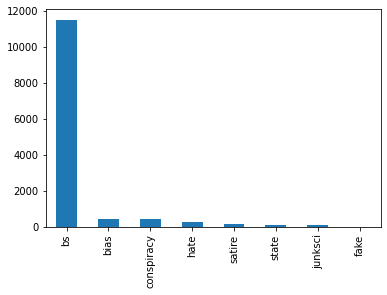

In [51]:

# print the topics being addressed here
fake_news['type'].value_counts().plot(kind="bar")
plt.show()


##**Feature 1 :** Source Reputation


##**Feature 2 :** Location- Geography


##**Feature 3 :** Social Credibility 


##**Feature 4 :** BERT model

# FINAL COMBINED MODEL

>